
In the dataset of a cyclone preheater which is part of an industrial process. In the duration of operation there are instances of abnormal operations.



Objective:
Using python and any algorithm of your choice, highlight time periods where this abnormality can be observed.

About the data

There are 6 variables and 370k records. Data is recorded once every 5 minutes over a duration of 3 years.

1.	Cyclone_Inlet_Gas_Temp – Temperature of Hot gas entering the cyclone.
2.	Cyclone_Gas_Outlet_Temp – Temperature of Hot gas leaving the cyclone.
3.	Cyclone_Outlet_Gas_draft – Draft (pressure) of gas at outlet of cyclone.
4.	Cyclone_cone_draft – Draft (pressure) of gas at cone section of cyclone.
ne.
6.	Cyclone_Material_Temp – Temperature of the material at the outlet of the cyclone.


In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [19]:
#Data Preprocessing
#1.Load data from excel file
orig_data = pd.read_excel(r"C:\Users\Bindhu\OneDrive\Desktop\Binny\ML Python\ML\DS ASS\data.xlsx")
orig_data

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96


In [20]:
# Exclude datetime column
data_values = orig_data.drop('time',
                        axis=1).values

In [22]:
# Convert data to float type
df = pd.DataFrame(orig_data)

# Function to convert all columns to float
def convert_to_float(df):
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, coercing errors to NaN
    return df

# Convert the DataFrame
df_float = convert_to_float(df)

# Display the result
print(df_float)
print(df_float.dtypes)  # Check datatypes of the columns

                       time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0       1483228800000000000                  867.63                 910.42   
1       1483229100000000000                  879.23                 918.14   
2       1483229400000000000                  875.67                 924.18   
3       1483229700000000000                  875.28                 923.15   
4       1483230000000000000                  891.66                 934.26   
...                     ...                     ...                    ...   
377714  1596801300000000000                  899.42                 919.79   
377715  1596801600000000000                  879.90                 895.02   
377716  1596801900000000000                  887.20                 895.70   
377717  1596802200000000000                  908.50                 916.33   
377718  1596802500000000000                  880.86                 905.31   

        Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_G

In [44]:
# Create new dataframe with converted values
data_converted = pd.DataFrame(df_float,
                              columns=df_float.columns[1:])
data_converted

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...
377714,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,879.90,895.02,-228.04,-211.28,878.08,-176.94
377716,887.20,895.70,-230.11,-214.65,885.32,-179.18
377717,908.50,916.33,-231.51,-218.09,906.20,-181.96


In [48]:
# Add back datetime column
data_converted.insert(0, 'time',
                      orig_data['time'])

In [50]:
data_converted = data_converted.dropna()

In [52]:
data_converted.shape

(376124, 7)

In [54]:
data_converted.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

In [56]:
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376124 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      376124 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376124 non-null  float64       
 2   Cyclone_Material_Temp     376124 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376124 non-null  float64       
 4   Cyclone_cone_draft        376124 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376124 non-null  float64       
 6   Cyclone_Inlet_Draft       376124 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.0 MB


In [62]:
data_converted.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376124,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000
mean,2018-10-21 01:56:22.020557568,727.387946,750.828429,-177.830733,-164.582678,715.798475,-141.309826
min,2017-01-01 00:00:00,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,2017-11-27 05:03:45,856.280000,867.660000,-247.190000,-226.770000,802.040000,-193.510000
50%,2018-10-21 08:57:30,882.380000,913.360000,-215.260000,-198.570000,871.530000,-169.460000
75%,2019-09-14 12:41:15,901.120000,943.660000,-170.150000,-143.680000,899.300000,-136.310000
max,2020-08-07 12:15:00,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000
std,NaN,328.634044,350.922335,99.138694,90.096403,325.316433,77.609444


In [70]:
pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB 8.6 MB/s eta 0:00:46
   ---------------------------------------- 0.8/390.3 MB 8.0 MB/s eta 0:00:49
   ---------------------------------------- 1.6/390.3 MB 11.1 MB/s eta 0:00:35
   ---------------------------------------- 3.0/390.3 MB 14.8 MB/s eta 0:00:27
   ---------------------------------------- 4.6/390.3 MB 18.5 MB/s eta 0:00:21
    --------------------------------------- 6.1/390.3 MB 20.4 MB/s eta 0:00:19
    --------------------------------------- 7.4/390.3 MB 21.6 MB/s eta 0:00:18
    --------------------------------------- 8.5/390.3 MB 21.7 MB/s eta 0:00:18
    --------------------------------------- 9.4/390.3 MB 21.5 MB/s eta 0:00:18
   - -------------------------------------- 10.4/390.3 MB 21.1 MB/s

In [74]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

In [78]:
# Exclude datetime column again
data_tensor = tf.convert_to_tensor(data_converted.drop(
    'time', axis=1).values, dtype=tf.float32)

In [80]:
# Define the autoencoder model
input_dim = data_converted.shape[1] - 1
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='relu')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [86]:
# Compile and fit the model
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_tensor, data_tensor, epochs=5,
                batch_size=32, shuffle=True)

Epoch 1/5
11754/11754 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 123162.7734
Epoch 2/5
11754/11754 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 123408.6797
Epoch 3/5
11754/11754 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 123238.9141
Epoch 4/5
11754/11754 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 123322.9531
Epoch 5/5
11754/11754 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - loss: 123266.8906


In [88]:
# Calculate the reconstruction error for each data point
reconstructions = autoencoder.predict(data_tensor)
mse = tf.reduce_mean(tf.square(data_tensor - reconstructions),
                     axis=1)
anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')
anomaly_scores.index = data_converted.index

11754/11754 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step


In [90]:
threshold = anomaly_scores.quantile(0.99)
anomalous = anomaly_scores > threshold
binary_labels = anomalous.astype(int)
precision, recall,\
    f1_score, _ = precision_recall_fscore_support(
        binary_labels, anomalous, average='binary')

In [117]:
test = data_converted['Cyclone_Material_Temp'].values
predictions = anomaly_scores.values

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


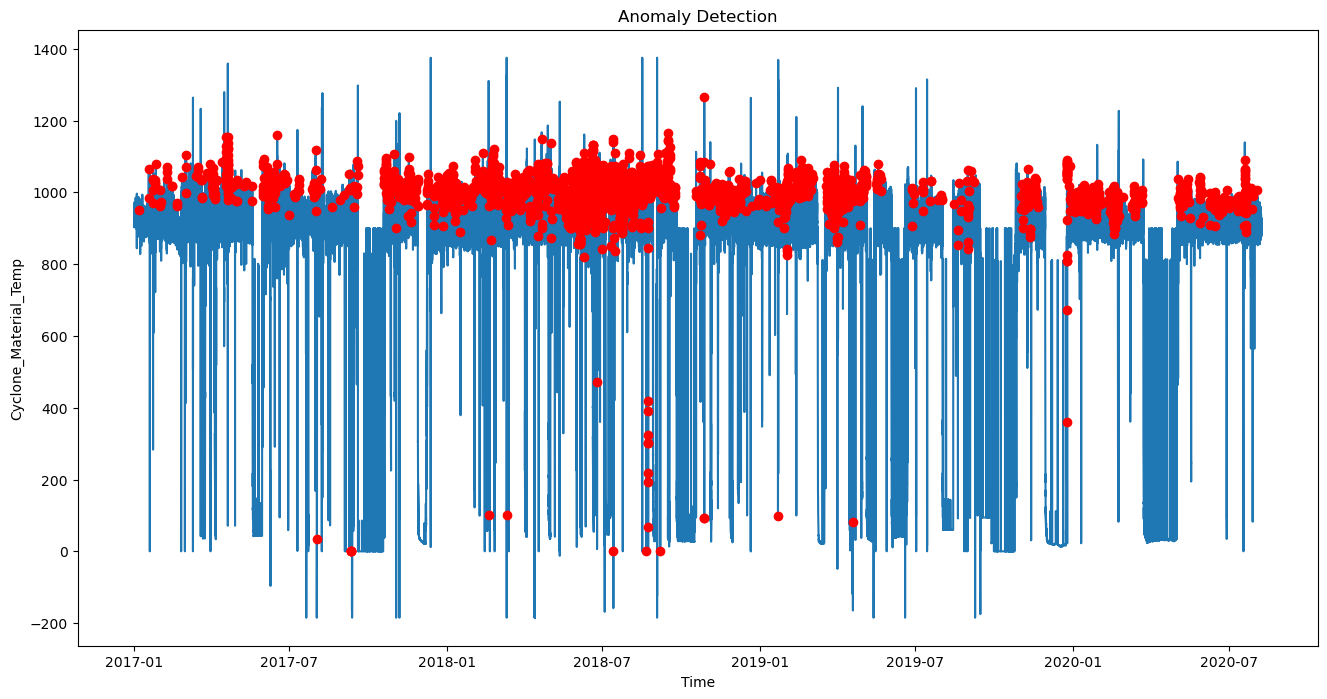

In [122]:
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['time'],
         data_converted['Cyclone_Material_Temp'])
plt.plot(data_converted['time'][anomalous],
         data_converted['Cyclone_Material_Temp'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Cyclone_Material_Temp')
plt.show()

In [100]:
#Cyclone_Inlet_Gas_Temp	Cyclone_Material_Temp	Cyclone_Outlet_Gas_draft	Cyclone_cone_draft	Cyclone_Gas_Outlet_Temp	Cyclone_Inlet_Draft
test = data_converted['Cyclone_Inlet_Gas_Temp'].values
predictions = anomaly_scores.values

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


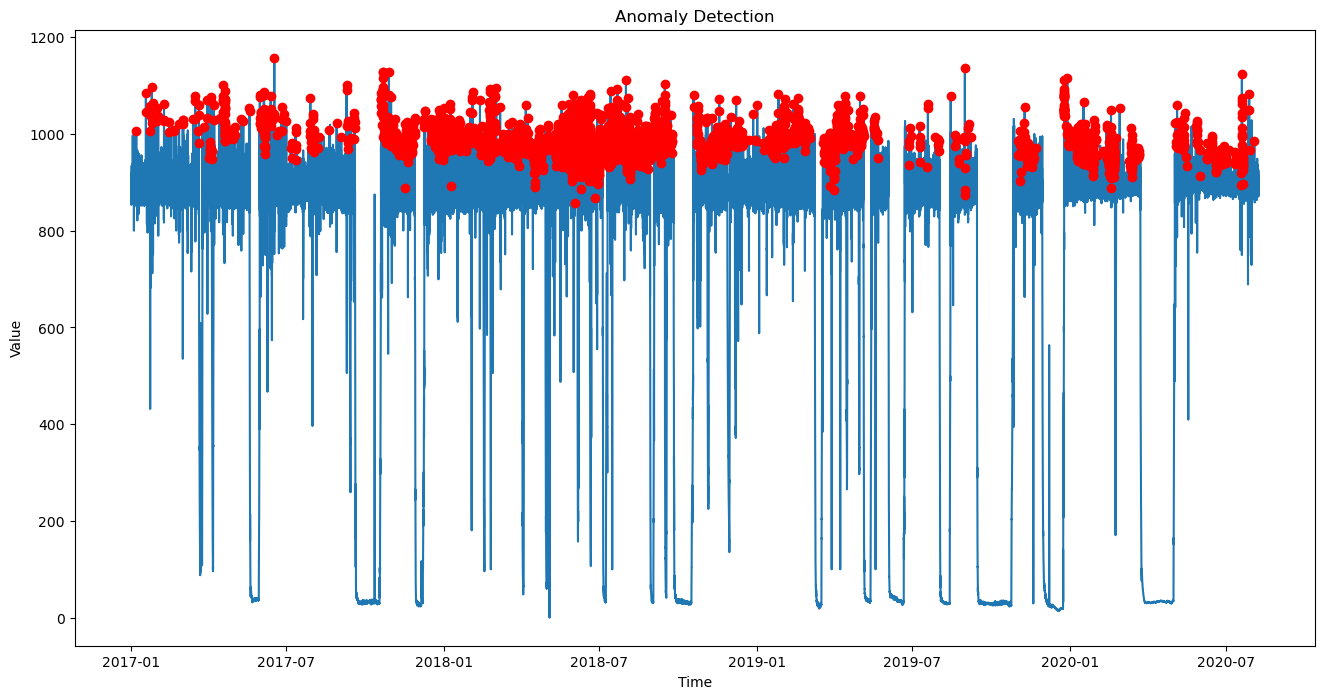

In [104]:
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['time'],
         data_converted['Cyclone_Inlet_Gas_Temp'])
plt.plot(data_converted['time'][anomalous],
         data_converted['Cyclone_Inlet_Gas_Temp'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [124]:
#Cyclone_Inlet_Gas_Temp	Cyclone_Material_Temp	Cyclone_Outlet_Gas_draft	Cyclone_cone_draft	Cyclone_Gas_Outlet_Temp	Cyclone_Inlet_Draft
test = data_converted['Cyclone_cone_draft'].values
predictions = anomaly_scores.values

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Precision:  1.0
Recall:  1.0
F1 Score:  1.0


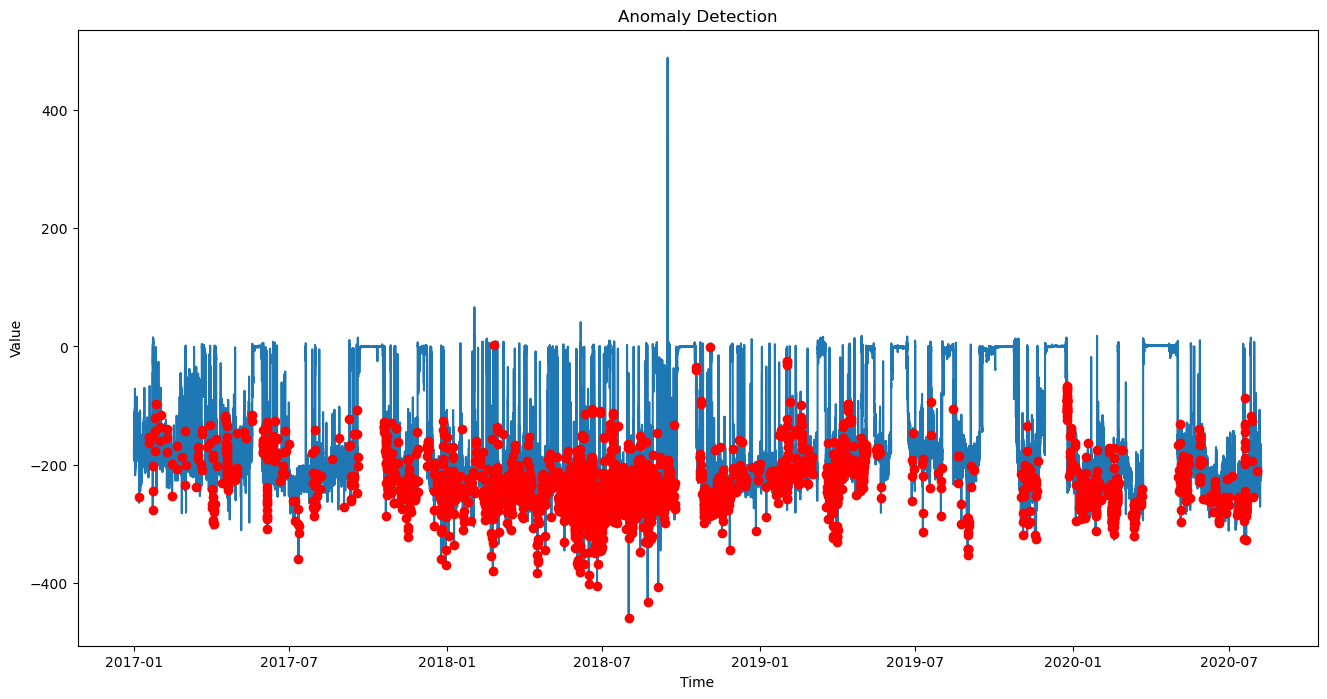

In [126]:

# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['time'],
         data_converted['Cyclone_cone_draft'])
plt.plot(data_converted['time'][anomalous],
         data_converted['Cyclone_cone_draft'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


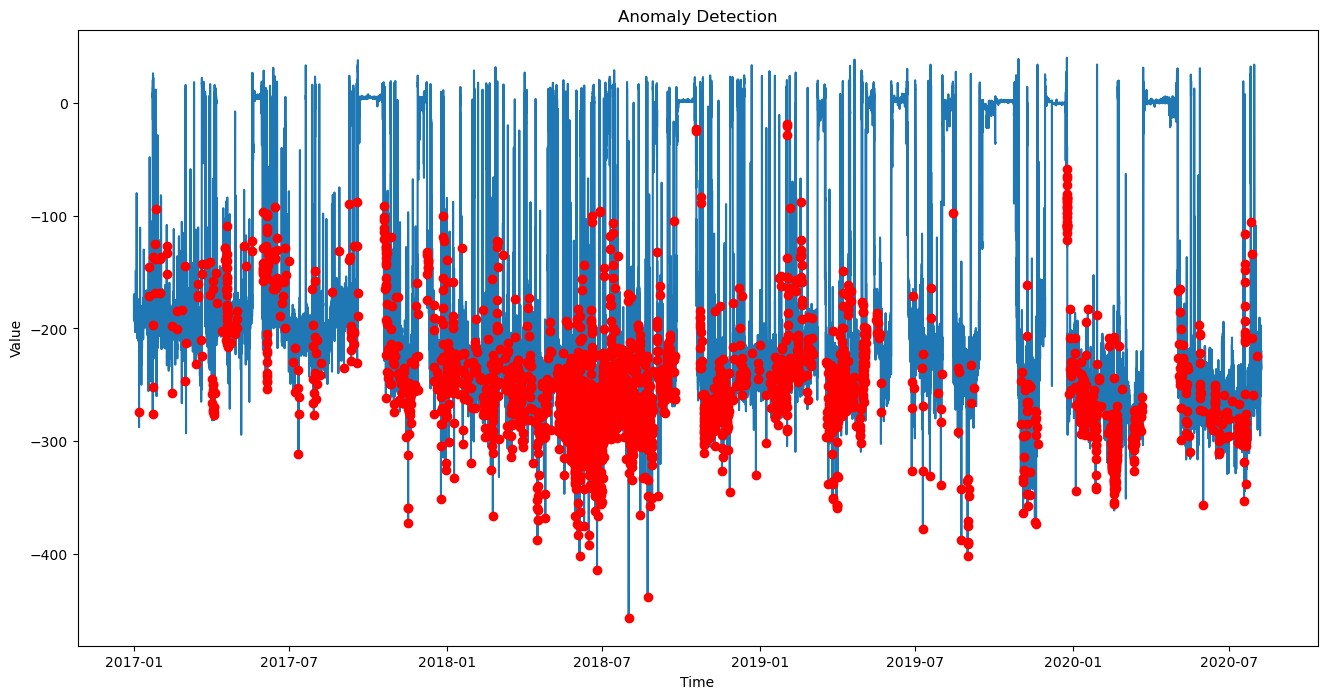

In [110]:
#Cyclone_Inlet_Gas_Temp	Cyclone_Material_Temp	Cyclone_Outlet_Gas_draft	Cyclone_cone_draft	Cyclone_Gas_Outlet_Temp	Cyclone_Inlet_Draft
test = data_converted['Cyclone_Outlet_Gas_draft'].values
predictions = anomaly_scores.values

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['time'],
         data_converted['Cyclone_Outlet_Gas_draft'])
plt.plot(data_converted['time'][anomalous],
         data_converted['Cyclone_Outlet_Gas_draft'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


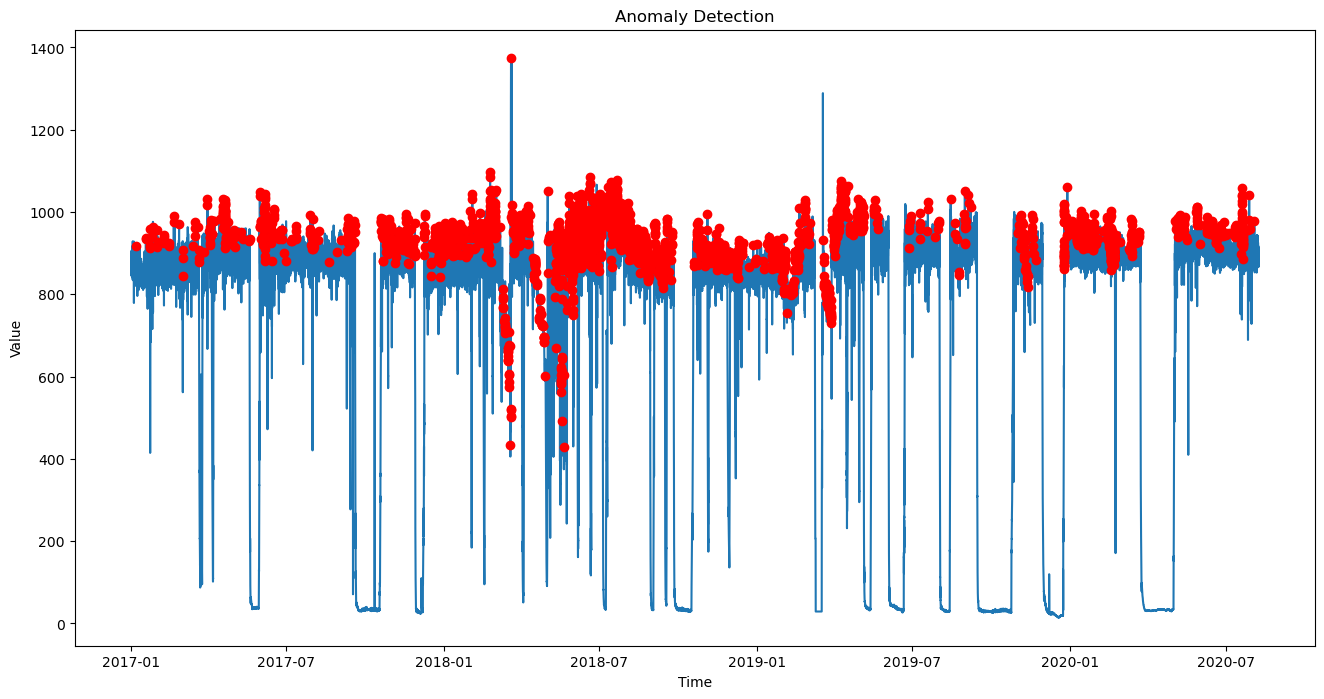

In [112]:
#Cyclone_Inlet_Gas_Temp	Cyclone_Material_Temp	Cyclone_Outlet_Gas_draft	Cyclone_cone_draft	Cyclone_Gas_Outlet_Temp	Cyclone_Inlet_Draft
test = data_converted['Cyclone_Gas_Outlet_Temp'].values
predictions = anomaly_scores.values

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['time'],
         data_converted['Cyclone_Gas_Outlet_Temp'])
plt.plot(data_converted['time'][anomalous],
         data_converted['Cyclone_Gas_Outlet_Temp'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


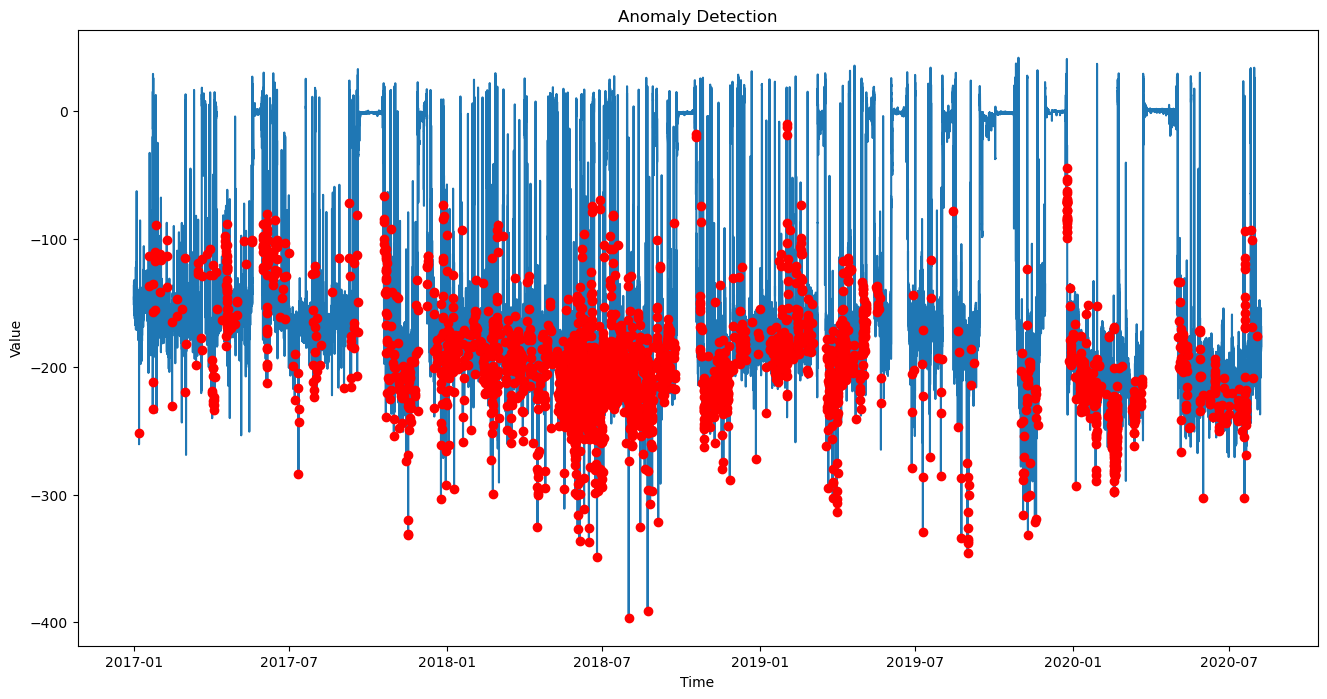

In [114]:
#Cyclone_Inlet_Gas_Temp	Cyclone_Material_Temp	Cyclone_Outlet_Gas_draft	Cyclone_cone_draft	Cyclone_Gas_Outlet_Temp	Cyclone_Inlet_Draft
test = data_converted['Cyclone_Inlet_Draft'].values
predictions = anomaly_scores.values

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
# Plot the data with anomalies marked in red
plt.figure(figsize=(16, 8))
plt.plot(data_converted['time'],
         data_converted['Cyclone_Inlet_Draft'])
plt.plot(data_converted['time'][anomalous],
         data_converted['Cyclone_Inlet_Draft'][anomalous], 'ro')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()